In [55]:
import pandas as pd
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt

In [56]:
#This data is a time series of Mercury readings in a river, over time
readings = pd.read_csv('mercurylevels.txt')
readings.head()

,250
0,1/3/2012 16:00:00\t26.96
1,1/4/2012 16:00:00\t27.47
2,1/5/2012 16:00:00\t27.728
3,1/6/2012 16:00:00\t28.19
4,1/9/2012 16:00:00\t28.1


In [57]:
    #Creating the DataFrame and defining columns
    df = pd.DataFrame(readings)
    df.columns = ['Date & Time']
    df['Reading']= df['Date & Time'].apply(lambda x: x.split(' ')[1].split('\t')[1].strip())
    df['Date & Time']= df['Date & Time'].apply(lambda x: x.split(',')[0].split(' ')[0].strip())
    #Remove "Missing_#" and add NaN in place
    df['Reading']= df.Reading.apply(pd.to_numeric, errors=('coerce'))
    
    #Making sure the whole column is now numeric, and all are defined as floats
    df.Reading = df.Reading.astype('float32')

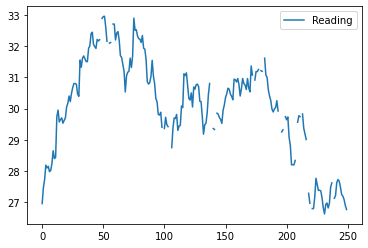

In [60]:
df.plot()
#We (obviously) have missing values that need to be filled in

In [61]:
#To interpolate our time series based on time, we need to set out Index in DateTime format

df['Date & Time'] = pd.to_datetime(df['Date & Time'], format='%m/%d/%Y')
df = df.set_index('Date & Time')
    
#Define new df and interpolate missing values
new_df = df.interpolate('time')

In [62]:
#Pointing back to original DF
df['Reading']= new_df['Reading']
df.head()

,Reading
Date & Time,
2012-01-03,26.959999
2012-01-04,27.469999
2012-01-05,27.728001
2012-01-06,28.190001
2012-01-09,28.100000


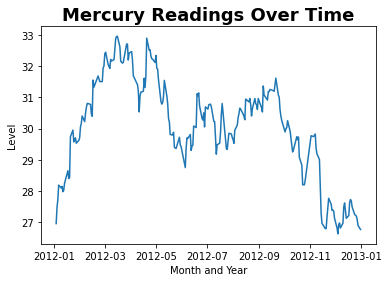

In [63]:
plt.plot(new_df)
plt.title('Mercury Readings Over Time',fontdict={'fontweight':'bold', 'fontsize': 18})
plt.ylabel('Level')
plt.xlabel('Month and Year')
plt.show()

#No more missing values!